In [1]:
import pandas as pd
import numpy as np
import requests
import acquire
import prepare

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = acquire.get_all_stuff()

In [3]:
df = prepare.to_datetime_utc(df)

In [4]:
df = prepare.make_cols(df)

In [5]:
df = prepare.make_new_sales_amounts(df)

In [6]:
prepare.re_index_by_time(df)

### Make subplots where each is plotting sales over different periods (daily, weekly, monthly, e.g.). The sales should be grouped by store (color to represent store).

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 to 2017-12-31
Data columns (total 20 columns):
item_id          913000 non-null int64
quantity         913000 non-null float64
sale_id          913000 non-null int64
store_id         913000 non-null int64
store_address    913000 non-null object
store_city       913000 non-null object
store_state      913000 non-null object
store_zipcode    913000 non-null int64
item_brand       913000 non-null object
item_name        913000 non-null object
item_price       913000 non-null float64
item_upc12       913000 non-null int64
item_upc14       913000 non-null int64
weekday          913000 non-null object
year             913000 non-null int64
quarter          913000 non-null int64
month            913000 non-null int64
day_of_month     913000 non-null int64
is_weekday       913000 non-null int64
sales_total      913000 non-null float64
dtypes: float64(3), int64(11), object(6)
memory usage: 146.3+ MB


/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


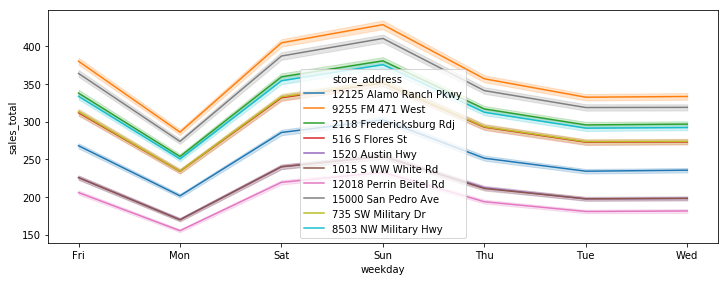

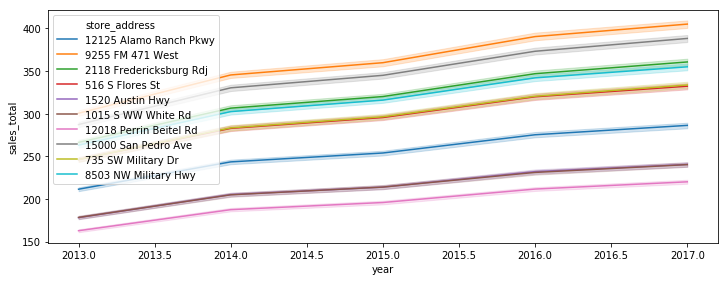

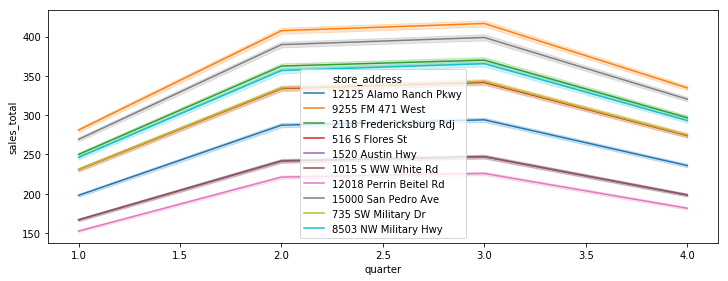

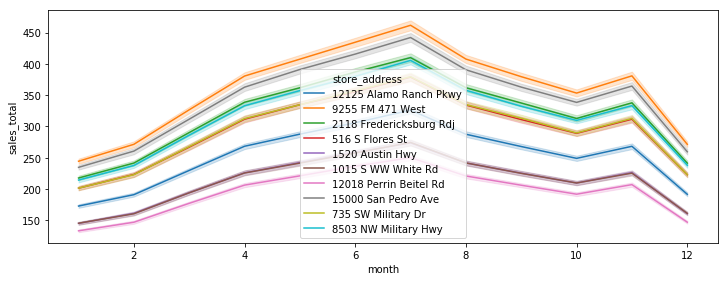

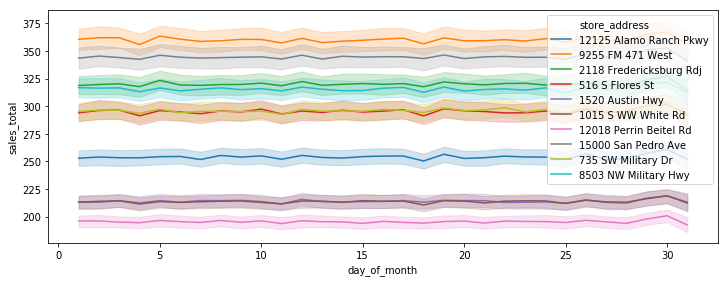

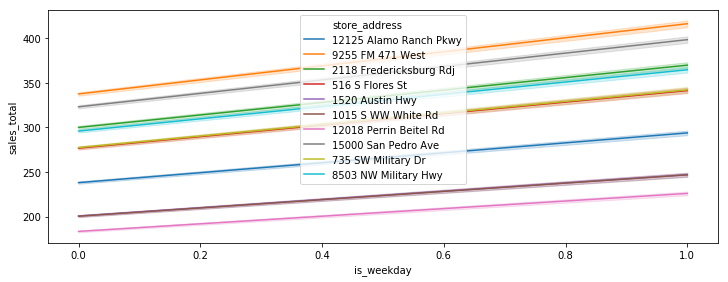

In [8]:
spans = ['weekday', 'year', 'quarter', 'month', 'day_of_month', 'is_weekday']

for i, feature in enumerate(spans):
    i = i+1
    plt.figure(figsize=(len(spans)*2, 30))
    plt.subplot(len(spans), 1, i)
    sns.lineplot(x=feature, y='sales_total', hue='store_address', data=df)

I want to see the number of each type of item that are sold over time for each store. Find a way to chart this. Hints: subplots for the piece with the fewest distinct values (like store), x = time, y = count, color = item. If you have too many distinct items, you may need to plot the top n, while aggregating the others into an 'other' bucket.

In [ ]:
df.item_name.value_counts()

In [11]:
df_tmp = df[df['store_id']==2]
df_tmp = df_tmp.reset_index()

In [12]:
df_tmp.head()

,sale_date,item_id,quantity,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,...,item_price,item_upc12,item_upc14,weekday,year,quarter,month,day_of_month,is_weekday,sales_total
0,2013-01-01 00:00:00+00:00,1,12.0,1827,2,9255 FM 471 West,San Antonio,TX,78251,Riceland,...,0.84,35200264013,35200264013,Tue,2013,1,1,1,0,10.08
1,2013-01-02 00:00:00+00:00,1,16.0,1828,2,9255 FM 471 West,San Antonio,TX,78251,Riceland,...,0.84,35200264013,35200264013,Wed,2013,1,1,2,0,13.44
2,2013-01-03 00:00:00+00:00,1,16.0,1829,2,9255 FM 471 West,San Antonio,TX,78251,Riceland,...,0.84,35200264013,35200264013,Thu,2013,1,1,3,0,13.44
3,2013-01-04 00:00:00+00:00,1,20.0,1830,2,9255 FM 471 West,San Antonio,TX,78251,Riceland,...,0.84,35200264013,35200264013,Fri,2013,1,1,4,0,16.80
4,2013-01-05 00:00:00+00:00,1,16.0,1831,2,9255 FM 471 West,San Antonio,TX,78251,Riceland,...,0.84,35200264013,35200264013,Sat,2013,1,1,5,1,13.44


In [13]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91300 entries, 0 to 91299
Data columns (total 21 columns):
sale_date        91300 non-null datetime64[ns, UTC]
item_id          91300 non-null int64
quantity         91300 non-null float64
sale_id          91300 non-null int64
store_id         91300 non-null int64
store_address    91300 non-null object
store_city       91300 non-null object
store_state      91300 non-null object
store_zipcode    91300 non-null int64
item_brand       91300 non-null object
item_name        91300 non-null object
item_price       91300 non-null float64
item_upc12       91300 non-null int64
item_upc14       91300 non-null int64
weekday          91300 non-null object
year             91300 non-null int64
quarter          91300 non-null int64
month            91300 non-null int64
day_of_month     91300 non-null int64
is_weekday       91300 non-null int64
sales_total      91300 non-null float64
dtypes: datetime64[ns, UTC](1), float64(3), int64(11), object(6)
me

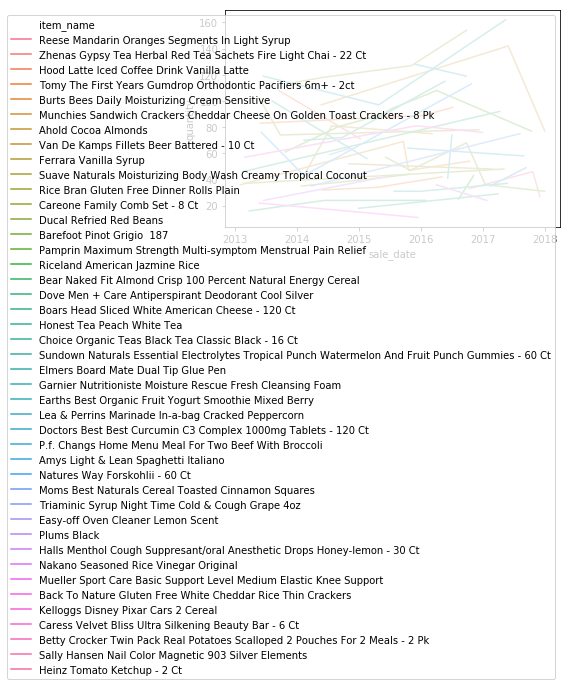

In [15]:
sns.lineplot(x='sale_date', y='quantity', hue='item_name', data=df_tmp.sample(100))

In [16]:
df.store_id.value_counts()

10    91300
9     91300
8     91300
7     91300
6     91300
5     91300
4     91300
3     91300
2     91300
1     91300
Name: store_id, dtype: int64

In [21]:
stores = [i for i in range(1,11)]

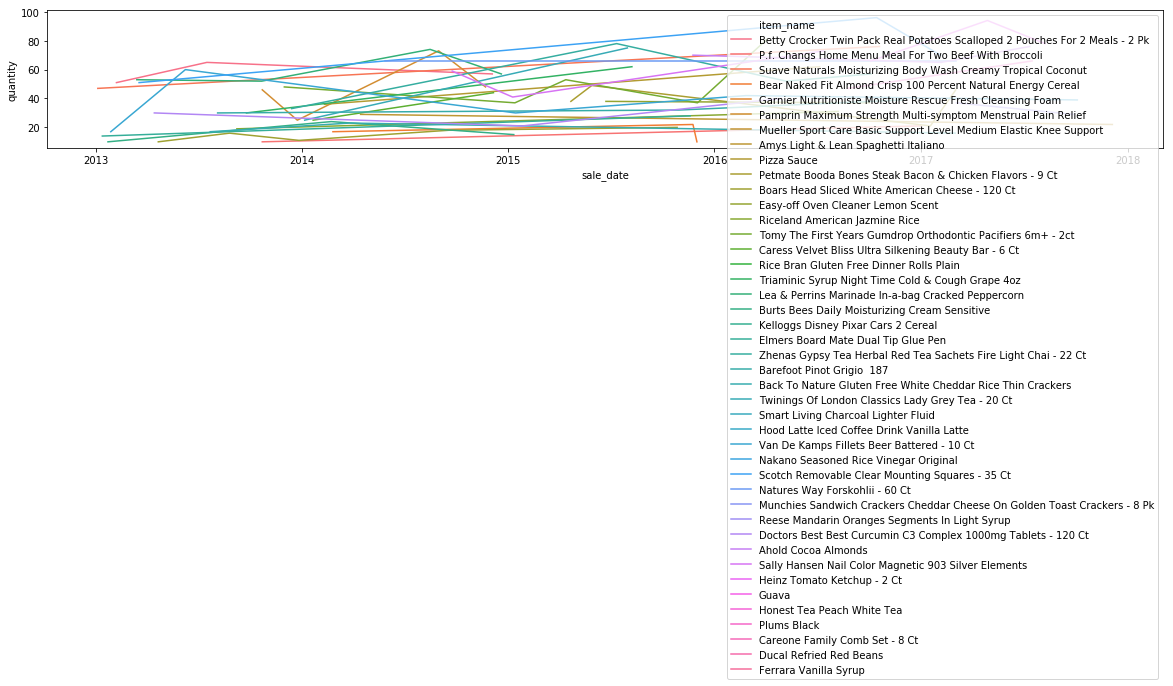

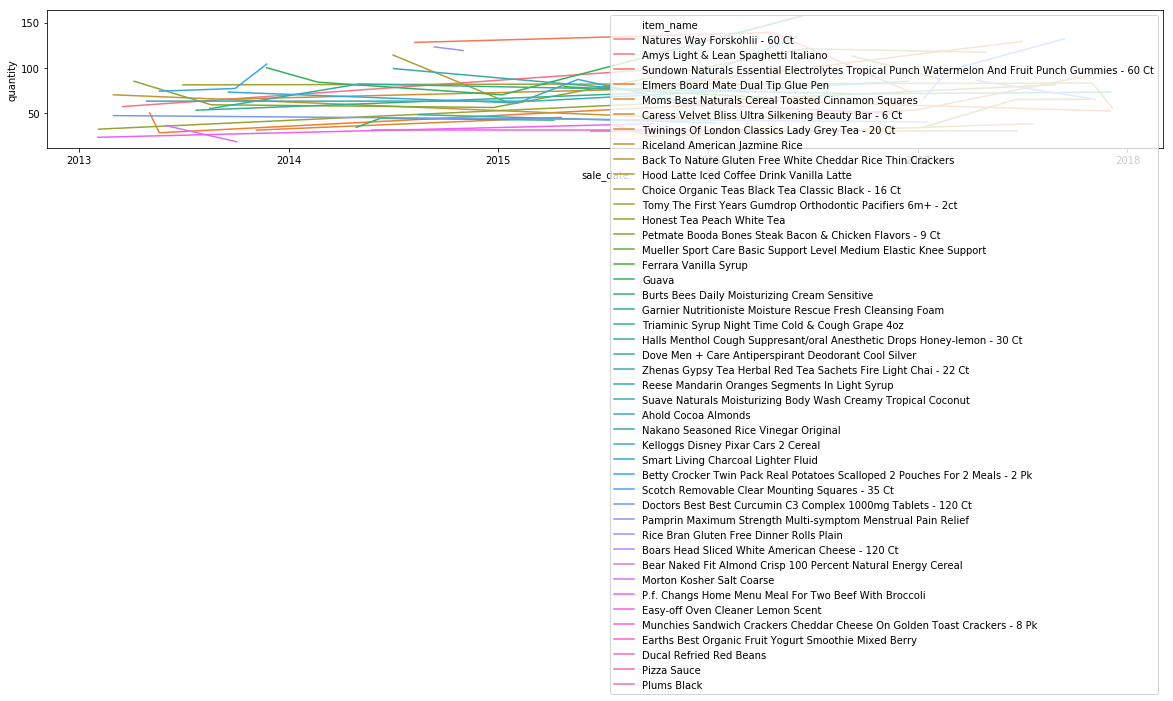

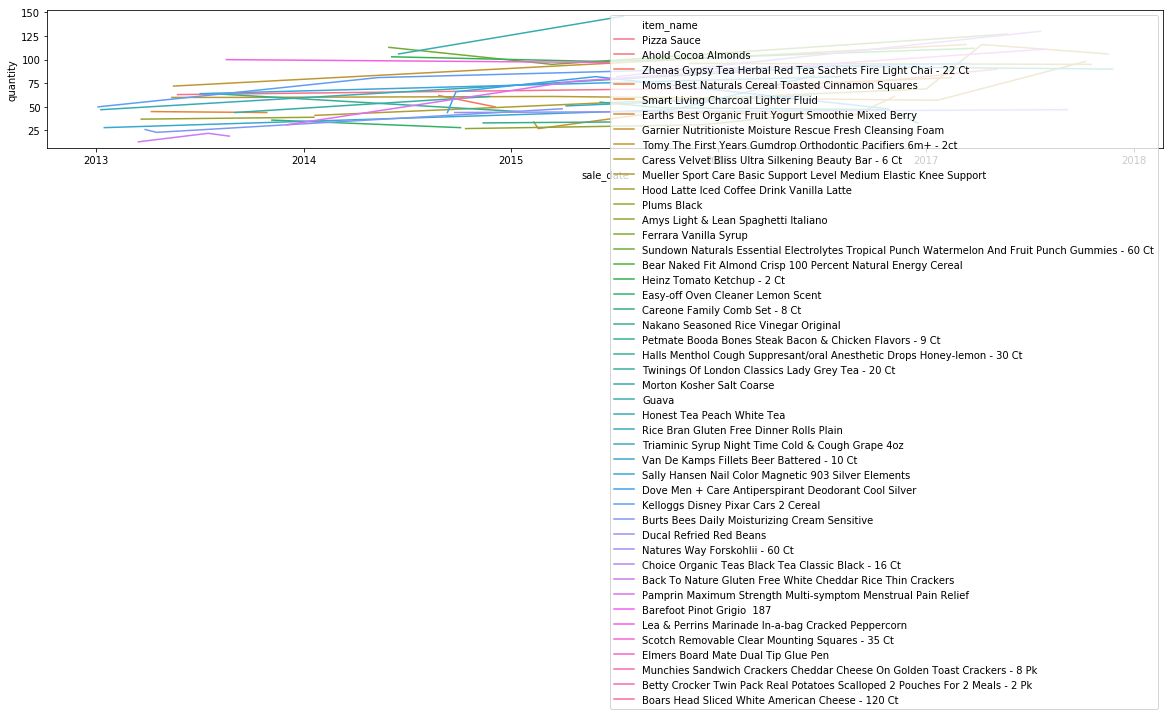

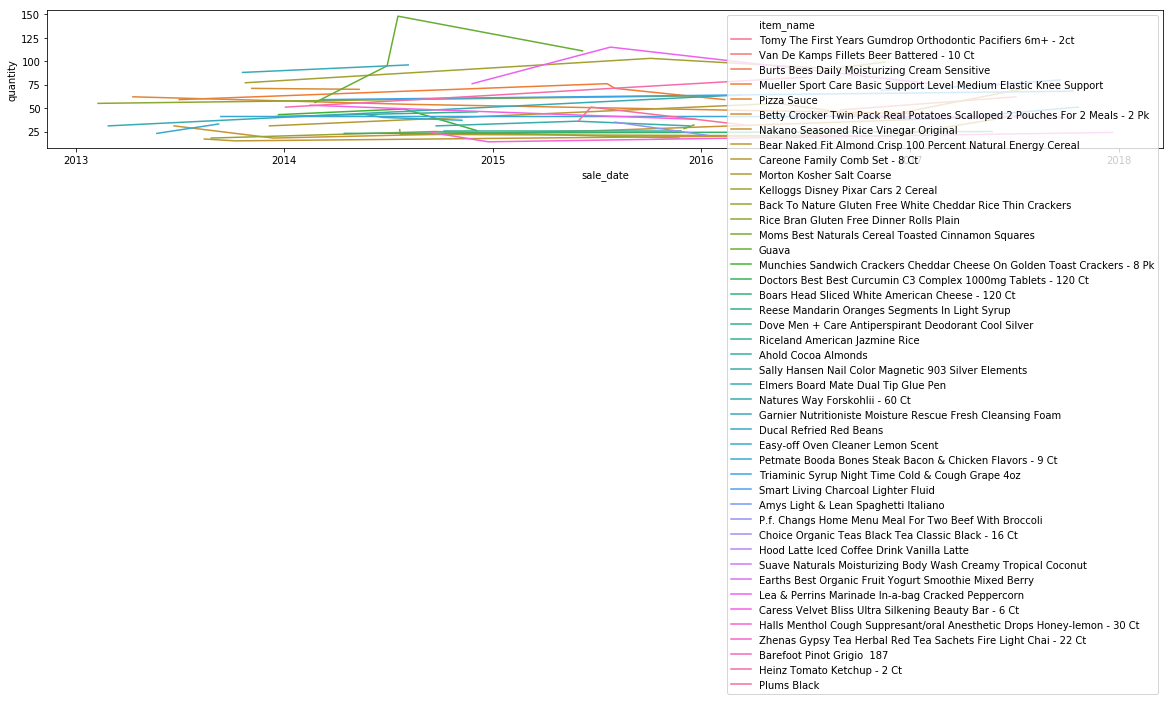

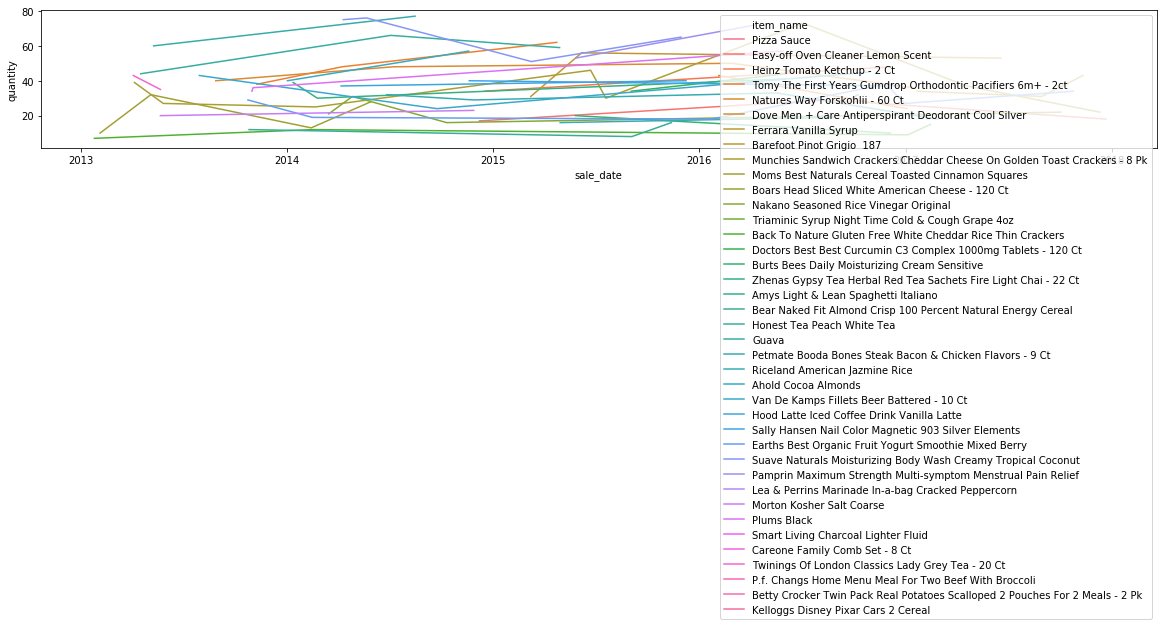

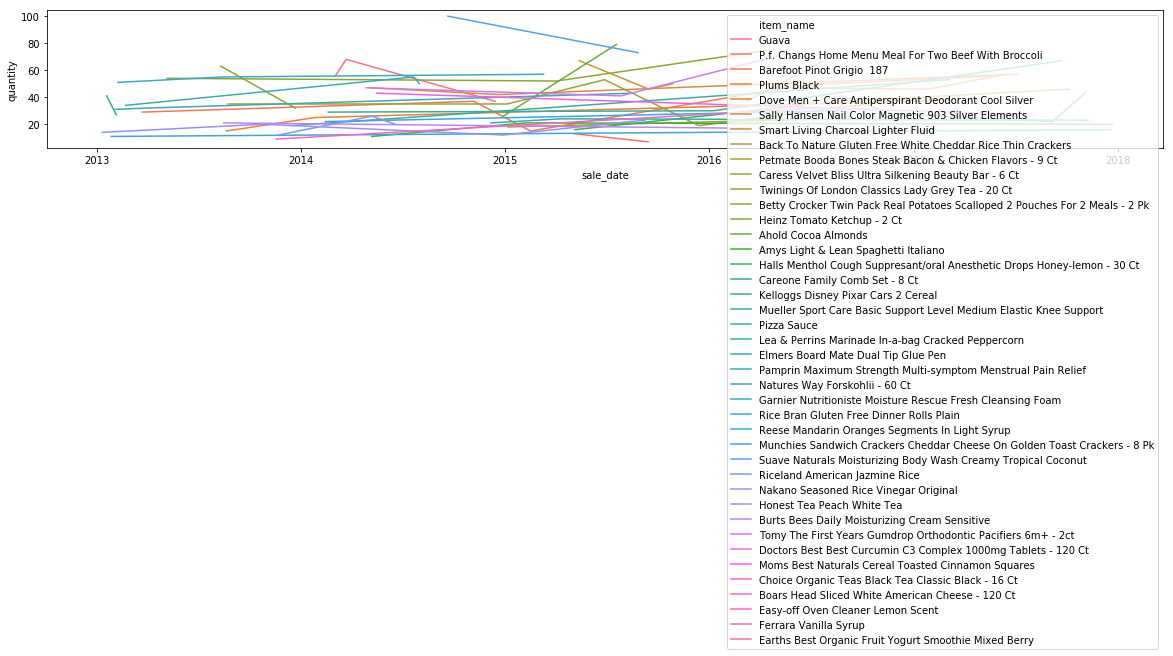

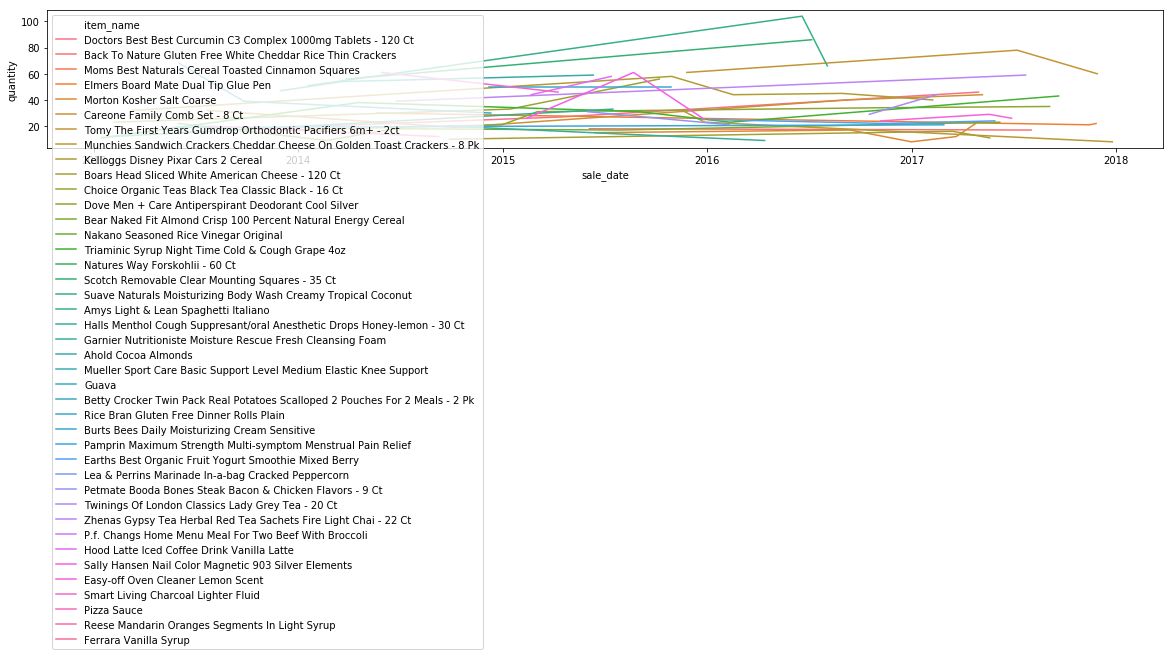

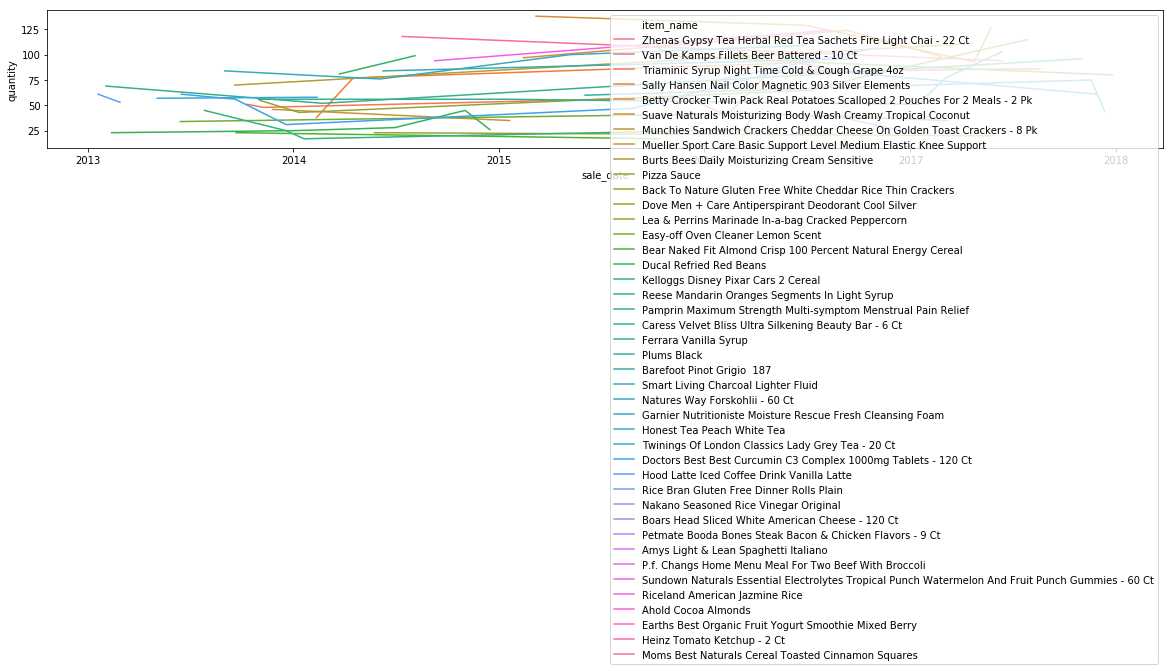

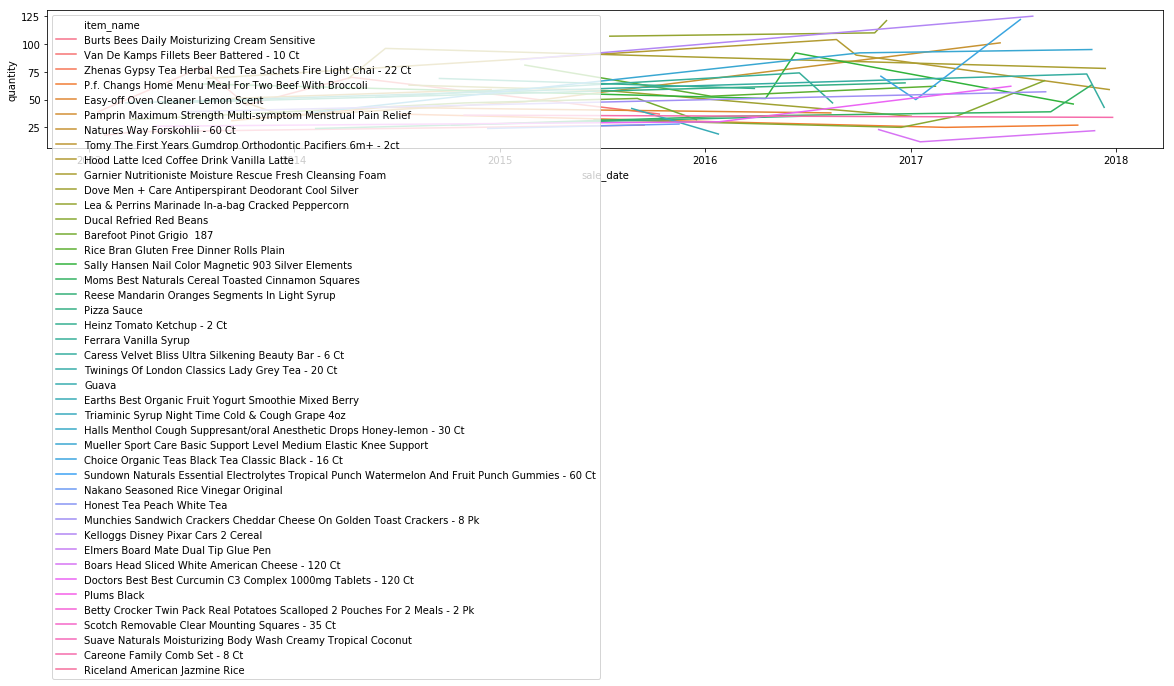

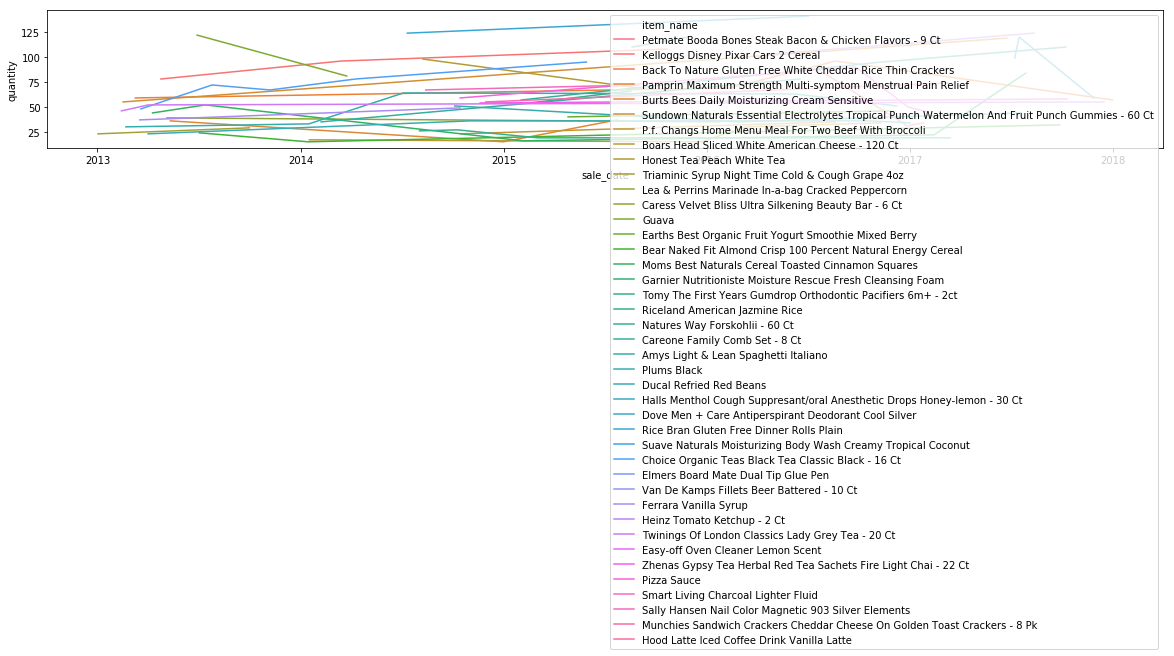

In [22]:

for i, store in enumerate(stores):
    df_tmp = df[df['store_id']== store]
    df_tmp = df_tmp.reset_index()
    i = i+1
    plt.figure(figsize=(len(stores)*2, 30))
    plt.subplot(len(stores), 1, i)
    sns.lineplot(x='sale_date', y='quantity', hue='item_name', data=df_tmp.sample(100))

,item_id,quantity,sale_id,store_id,store_zipcode,item_price,item_upc12,item_upc14,year,quarter,month,day_of_month,is_weekday,sales_total
sale_date,,,,,,,,,,,,,,
2013-01-31 00:00:00+00:00,395250,454904.0,7061846500,85250,1212484400,79986.2,3696266159611120,3696266159611120,31201500,15500,15500,248000,4000,2447368.20
2013-02-28 00:00:00+00:00,357000,459417.0,6378855000,77000,1095147200,72245.6,3338562982874560,3338562982874560,28182000,14000,28000,203000,4000,2469765.97
2013-03-31 00:00:00+00:00,395250,617382.0,7062761000,85250,1212484400,79986.2,3696266159611120,3696266159611120,31201500,15500,46500,248000,5000,3319815.58
2013-04-30 00:00:00+00:00,382500,682274.0,6835387500,82500,1173372000,77406.0,3577031767365600,3577031767365600,30195000,30000,60000,232500,4000,3666901.23
2013-05-31 00:00:00+00:00,395250,763242.0,7063706500,85250,1212484400,79986.2,3696266159611120,3696266159611120,31201500,31000,77500,248000,4000,4102278.40
2013-06-30 00:00:00+00:00,382500,795597.0,6836302500,82500,1173372000,77406.0,3577031767365600,3577031767365600,30195000,30000,90000,232500,5000,4278919.18
2013-07-31 00:00:00+00:00,395250,855922.0,7064652000,85250,1212484400,79986.2,3696266159611120,3696266159611120,31201500,46500,108500,248000,4000,4601659.23
2013-08-31 00:00:00+00:00,395250,766761.0,7065132500,85250,1212484400,79986.2,3696266159611120,3696266159611120,31201500,46500,124000,248000,4500,4125842.31
2013-09-30 00:00:00+00:00,382500,689907.0,6837682500,82500,1173372000,77406.0,3577031767365600,3577031767365600,30195000,45000,135000,232500,4500,3708565.41
